In [45]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
import pandas as pd
from astropy.table import Table
from astropy import units as u
from astropy.coordinates import SkyCoord
#using astropy.coordinates to match catalogs and plan observations. 

In [2]:
cluster_table1 = pd.read_csv('./result.csv')
cluster_table1

,ra,dec,u,g,r,i,z
0,132.754774,11.763100,25.574389,25.531109,22.273064,20.558144,19.475832
1,132.754813,11.763082,24.073753,23.573519,22.595755,20.294937,19.569992
2,132.754818,11.763077,24.699436,23.619717,21.927774,20.340866,19.624466
3,132.754839,11.914576,24.396688,24.169111,22.455055,20.980927,20.159254
4,132.754887,11.914579,24.813807,25.414293,22.473461,21.142805,20.011454
5,132.754896,11.709294,24.347908,23.369402,22.294655,21.496990,20.938927
6,132.755025,11.709175,24.398809,23.278193,22.597179,21.420679,20.881630
7,132.755042,11.805943,19.931450,17.359560,16.331385,15.977480,15.801881
8,132.755157,11.805047,23.044250,20.647146,19.765505,19.369196,19.260439
9,132.755167,11.679234,23.788565,22.245754,21.214222,20.827341,21.101912


In [3]:
cluster_table1["u-g"] = cluster_table1['u']-cluster_table1['g']
cluster_table1

,ra,dec,u,g,r,i,z,u-g
0,132.754774,11.763100,25.574389,25.531109,22.273064,20.558144,19.475832,0.043280
1,132.754813,11.763082,24.073753,23.573519,22.595755,20.294937,19.569992,0.500234
2,132.754818,11.763077,24.699436,23.619717,21.927774,20.340866,19.624466,1.079719
3,132.754839,11.914576,24.396688,24.169111,22.455055,20.980927,20.159254,0.227577
4,132.754887,11.914579,24.813807,25.414293,22.473461,21.142805,20.011454,-0.600486
5,132.754896,11.709294,24.347908,23.369402,22.294655,21.496990,20.938927,0.978506
6,132.755025,11.709175,24.398809,23.278193,22.597179,21.420679,20.881630,1.120616
7,132.755042,11.805943,19.931450,17.359560,16.331385,15.977480,15.801881,2.571890
8,132.755157,11.805047,23.044250,20.647146,19.765505,19.369196,19.260439,2.397104
9,132.755167,11.679234,23.788565,22.245754,21.214222,20.827341,21.101912,1.542811


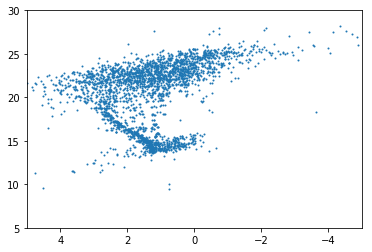

In [4]:
fig , ax = plt.subplots()
ax.scatter(cluster_table1["u-g"], cluster_table1["g"], s=1)
plt.xlim(xmin = -5,xmax = 5);
plt.ylim(ymin = 5,ymax = 30);
ax.invert_xaxis()

In [5]:
cluster_table1["r-i"] = cluster_table1['r']-cluster_table1['i']
cluster_table1

,ra,dec,u,g,r,i,z,u-g,r-i
0,132.754774,11.763100,25.574389,25.531109,22.273064,20.558144,19.475832,0.043280,1.714920
1,132.754813,11.763082,24.073753,23.573519,22.595755,20.294937,19.569992,0.500234,2.300818
2,132.754818,11.763077,24.699436,23.619717,21.927774,20.340866,19.624466,1.079719,1.586908
3,132.754839,11.914576,24.396688,24.169111,22.455055,20.980927,20.159254,0.227577,1.474128
4,132.754887,11.914579,24.813807,25.414293,22.473461,21.142805,20.011454,-0.600486,1.330656
5,132.754896,11.709294,24.347908,23.369402,22.294655,21.496990,20.938927,0.978506,0.797665
6,132.755025,11.709175,24.398809,23.278193,22.597179,21.420679,20.881630,1.120616,1.176500
7,132.755042,11.805943,19.931450,17.359560,16.331385,15.977480,15.801881,2.571890,0.353905
8,132.755157,11.805047,23.044250,20.647146,19.765505,19.369196,19.260439,2.397104,0.396309
9,132.755167,11.679234,23.788565,22.245754,21.214222,20.827341,21.101912,1.542811,0.386881


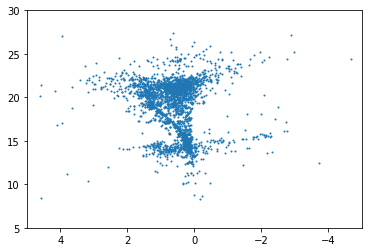

In [6]:
fig , ax = plt.subplots()
ax.scatter(cluster_table1["r"]-cluster_table1['i'], cluster_table1["i"], s=1)
plt.xlim(xmin = -5,xmax = 5);
plt.ylim(ymin = 5,ymax = 30);
ax.invert_xaxis()

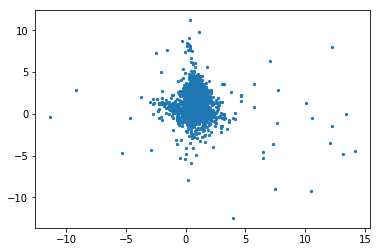

In [7]:
fig , ax = plt.subplots()
ax.scatter(cluster_table1["r-i"], cluster_table1["u-g"], s=5)

In [8]:
cluster_table1["r-z"] = cluster_table1['r']-cluster_table1['z']
cluster_table1["g-i"] = cluster_table1['g']-cluster_table1['i']
cluster_table1

,ra,dec,u,g,r,i,z,u-g,r-i,r-z,g-i
0,132.754774,11.763100,25.574389,25.531109,22.273064,20.558144,19.475832,0.043280,1.714920,2.797232,4.972965
1,132.754813,11.763082,24.073753,23.573519,22.595755,20.294937,19.569992,0.500234,2.300818,3.025763,3.278582
2,132.754818,11.763077,24.699436,23.619717,21.927774,20.340866,19.624466,1.079719,1.586908,2.303308,3.278851
3,132.754839,11.914576,24.396688,24.169111,22.455055,20.980927,20.159254,0.227577,1.474128,2.295801,3.188184
4,132.754887,11.914579,24.813807,25.414293,22.473461,21.142805,20.011454,-0.600486,1.330656,2.462007,4.271488
5,132.754896,11.709294,24.347908,23.369402,22.294655,21.496990,20.938927,0.978506,0.797665,1.355728,1.872412
6,132.755025,11.709175,24.398809,23.278193,22.597179,21.420679,20.881630,1.120616,1.176500,1.715549,1.857514
7,132.755042,11.805943,19.931450,17.359560,16.331385,15.977480,15.801881,2.571890,0.353905,0.529504,1.382080
8,132.755157,11.805047,23.044250,20.647146,19.765505,19.369196,19.260439,2.397104,0.396309,0.505066,1.277950
9,132.755167,11.679234,23.788565,22.245754,21.214222,20.827341,21.101912,1.542811,0.386881,0.112310,1.418413


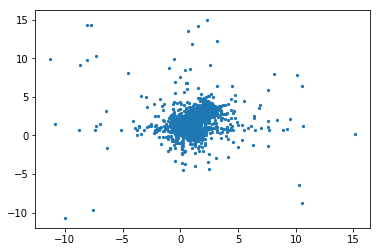

In [9]:
fig , ax = plt.subplots()
ax.scatter(cluster_table1["r-z"], cluster_table1["g-i"], s=5)

In [10]:
cluster_table2 = pd.read_csv('./result2.csv')
cluster_table2["u-g"] = cluster_table2['u']-cluster_table2['g']
cluster_table2["r-i"] = cluster_table2['r']-cluster_table2['i']
cluster_table2["r-z"] = cluster_table2['r']-cluster_table2['z']
cluster_table2["g-i"] = cluster_table2['g']-cluster_table2['i']
cluster_table2

,ra,dec,u,g,r,i,z,u-g,r-i,r-z,g-i
0,132.474967,12.220270,24.683121,22.477789,21.460186,20.989202,21.206718,2.205332,0.470984,0.253468,1.488587
1,132.475000,12.077701,23.545692,21.914206,21.141102,20.679737,20.779816,1.631486,0.461365,0.361286,1.234469
2,132.475008,12.077644,23.727400,22.007372,21.072012,20.673861,20.402328,1.720028,0.398151,0.669684,1.333511
3,132.475022,12.077657,24.241390,22.044069,21.073606,20.711674,20.270441,2.197321,0.361932,0.803165,1.332395
4,132.475065,11.763971,24.214428,22.030504,20.608728,19.278370,18.617804,2.183924,1.330358,1.990924,2.752134
5,132.475065,11.763972,23.994686,21.933569,20.573351,19.304005,18.632397,2.061117,1.269346,1.940954,2.629564
6,132.475076,11.621552,23.890825,22.780745,21.931530,21.559710,20.241005,1.110080,0.371820,1.690525,1.221035
7,132.475080,11.578941,24.634674,25.114412,19.328741,18.180882,17.695770,-0.479738,1.147859,1.632971,6.933530
8,132.475094,11.383116,21.474577,21.229956,21.137596,20.823357,20.543316,0.244621,0.314239,0.594280,0.406599
9,132.475096,11.383098,21.353695,21.258259,21.149824,20.880369,20.694748,0.095436,0.269455,0.455076,0.377890


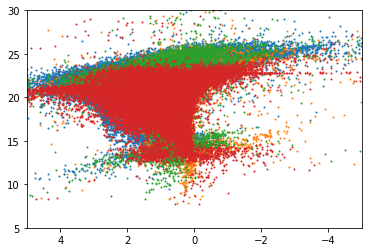

In [11]:
fig , ax = plt.subplots()
ax.scatter(cluster_table2["u-g"], cluster_table2["g"], s=1)
ax.scatter(cluster_table2["r"]-cluster_table2['i'], cluster_table2["i"], s=1)
ax.scatter(cluster_table2["g"]-cluster_table2['r'], cluster_table2["r"], s=1)
ax.scatter(cluster_table2["r-z"], cluster_table2["z"], s=1)
plt.xlim(xmin = -5,xmax = 5);
plt.ylim(ymin = 5,ymax = 30);
ax.invert_xaxis()

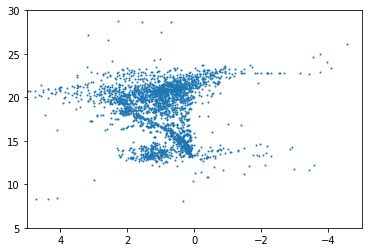

In [12]:
fig , ax = plt.subplots()
#ax.scatter(cluster_table1["r"]-cluster_table1['i'], cluster_table1["i"], s=1)
#ax.scatter(cluster_table1["u"]-cluster_table1['g'], cluster_table1["g"], s=1)
ax.scatter(cluster_table1["r"]-cluster_table1['z'], cluster_table1["z"], s=1)
#ax.scatter(cluster_table1['g']-cluster_table1['r'], cluster_table1['r'], s=1)
plt.xlim(xmin = -5,xmax = 5);
plt.ylim(ymin = 5,ymax = 30);
ax.invert_xaxis()

In [13]:
mass = Table.read('irsa_catalog_search_results.tbl', format='ascii')
mass
#match_to_catalog_3d

ra,dec,err_maj,err_min,err_ang,designation,j_m,j_cmsig,j_msigcom,j_snr,h_m,h_cmsig,h_msigcom,h_snr,k_m,k_cmsig,k_msigcom,k_snr,ph_qual,rd_flg,bl_flg,cc_flg,ndet,gal_contam,mp_flg,j_h,h_k,j_k
deg,deg,arcsec,arcsec,deg,,mag,mag,mag,,mag,mag,mag,,mag,mag,mag,,,,,,,,,,,
float64,float64,float64,float64,int32,str16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str3,str3,str3,str3,str6,int32,int32,float64,float64,float64
132.653861,11.945537,0.08,0.07,4,08503692+1156439,15.781,0.064,0.065,18.8,15.379,0.094,0.095,12.1,15.009,0.092,0.093,11.4,AAA,222,111,000,460606,0,0,0.402,0.37,0.772
132.631498,11.981374,0.07,0.06,0,08503155+1158529,14.247,0.025,0.028,77.4,13.959,0.031,0.032,44.7,13.859,0.038,0.039,33.0,AAA,222,111,000,666666,0,0,0.288,0.1,0.388
132.631687,11.975251,0.12,0.12,67,08503160+1158309,16.303,0.103,0.104,11.7,15.327,0.085,0.086,12.7,15.166,0.111,0.111,9.9,AAB,222,111,000,050506,0,0,0.976,0.161,1.137
132.631443,11.949438,0.27,0.26,173,08503154+1156579,16.349,0.099,0.1,11.2,16.093,0.176,0.176,6.3,15.84,0.216,0.216,5.3,ACC,222,111,000,060506,0,0,0.256,0.253,0.509
132.62279,11.996955,0.07,0.06,0,08502946+1159490,15.285,0.044,0.045,29.8,14.632,0.048,0.049,24.1,14.616,0.066,0.066,16.4,AAA,222,111,000,662506,0,0,0.653,0.016,0.669
132.61517,11.977185,0.24,0.23,65,08502764+1158378,16.537,0.131,0.132,9.4,16.045,0.178,0.179,5.9,15.684,0.186,0.187,5.5,BCC,222,111,000,160406,0,0,0.492,0.361,0.853
132.795114,11.95286,0.2,0.19,114,08511082+1157102,16.202,0.082,0.083,13.2,15.862,0.141,0.142,8.0,15.396,0.143,0.144,8.0,ABB,222,111,000,261506,0,0,0.34,0.466,0.806
132.786891,11.964923,0.09,0.06,0,08510885+1157537,13.127,0.019,0.023,224.7,12.848,0.023,0.024,128.7,12.781,0.021,0.023,88.9,AAA,222,111,000,666666,0,0,0.279,0.067,0.346


In [14]:
wise = Table.read('irsa_catalog_search_results(1).tbl', format='ascii')
wise

designation,ra,dec,sigra,sigdec,sigradec,w1mpro,w1sigmpro,w1snr,w1rchi2,w2mpro,w2sigmpro,w2snr,w2rchi2,w3mpro,w3sigmpro,w3snr,w3rchi2,w4mpro,w4sigmpro,w4snr,w4rchi2,nb,na,w1sat,w2sat,w3sat,w4sat,cc_flags,ext_flg,var_flg,moon_lev,w1nm,w1m,w2nm,w2m,w3nm,w3m,w4nm,w4m,tmass_key,j_m_2mass,j_msig_2mass,h_m_2mass,h_msig_2mass,k_m_2mass,k_msig_2mass
,deg,deg,arcsec,arcsec,arcsec,mag,mag,,,mag,mag,,,mag,mag,,,mag,mag,,,,,,,,,,,,,,,,,,,,,,mag,mag,mag,mag,mag,mag
str19,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,float64,float64,float64,float64,str4,int32,str4,str4,int32,int32,int32,int32,int32,int32,int32,int32,int32,float64,float64,float64,float64,float64,float64
J085036.92+115643.9,132.6538438,11.9455383,0.2178,0.2377,-0.0109,14.98,0.043,25.5,0.8222,15.024,0.106,10.2,0.8719,12.312,--,0.7,1.118,8.516,--,1.1,0.8635,1,0,0.0,0.0,0.0,0.0,0000,0,02nn,0000,11,11,6,11,0,11,0,11,131206276,15.781,0.065,15.379,0.095,15.009,0.093
J085035.03+115728.2,132.6459658,11.9578407,0.4365,0.4819,-0.0534,16.001,0.077,14.0,0.8518,16.145,0.306,3.6,0.8418,12.605,--,-2.4,0.761,8.881,0.469,2.3,0.9825,1,0,0.0,0.0,0.0,0.0,0000,0,0nnn,0000,10,11,0,11,0,11,0,11,--,--,--,--,--,--,--
J085034.50+115703.5,132.6437878,11.9509943,0.4175,0.452,-0.0454,15.902,0.074,14.7,0.6863,15.82,0.233,4.7,1.07,12.614,--,-0.8,0.9285,8.985,--,-0.8,0.9794,1,0,0.0,0.0,0.0,0.0,0000,0,0nnn,0000,10,11,2,11,0,11,0,11,--,--,--,--,--,--,--
J085031.56+115852.9,132.6315036,11.9813828,0.1324,0.1422,-0.023,13.886,0.029,37.0,0.8804,14.009,0.054,20.0,0.9671,12.602,--,-2.4,0.9347,8.951,0.505,2.1,1.063,1,0,0.0,0.0,0.0,0.0,0000,0,00nn,0000,10,10,10,10,0,10,0,10,131206214,14.247,0.028,13.959,0.032,13.859,0.039
J085030.82+115806.3,132.6284491,11.9684399,0.7468,0.8487,-0.0947,16.611,0.128,8.5,0.8273,16.123,--,1.7,0.8414,12.415,--,0.3,0.9361,8.969,--,-0.2,0.9554,1,0,0.0,0.0,0.0,0.0,0000,0,nnnn,0000,3,10,1,10,0,10,0,10,--,--,--,--,--,--,--
J085031.58+115830.9,132.6316157,11.9752512,0.2794,0.3145,-0.0306,15.324,0.053,20.4,0.8461,15.423,0.167,6.5,0.8171,12.54,--,-2.1,0.9298,8.642,--,0.9,1.0,1,0,0.0,0.0,0.0,0.003,0000,0,0nnn,0000,10,11,1,11,0,10,0,11,131206226,16.303,0.104,15.327,0.086,15.166,0.111
J085031.56+115658.1,132.6315235,11.9494851,0.434,0.483,0.0241,15.992,0.077,14.1,0.8054,16.059,0.27,4.0,0.8288,12.601,--,-0.1,1.117,9.087,--,-0.6,0.905,1,0,0.0,0.0,0.0,0.0,0000,0,1nnn,0000,10,11,0,11,0,11,0,11,131206271,16.349,0.1,16.093,0.176,15.84,0.216
J085030.26+115935.5,132.6261183,11.9932068,0.336,0.378,0.0549,15.628,0.062,17.4,0.7328,15.594,0.179,6.1,0.8797,12.099,0.356,3.1,1.018,8.693,--,0.7,0.9973,1,0,0.0,0.0,0.0,0.0,0000,0,0nnn,0000,10,10,1,10,1,10,0,10,--,--,--,--,--,--,--


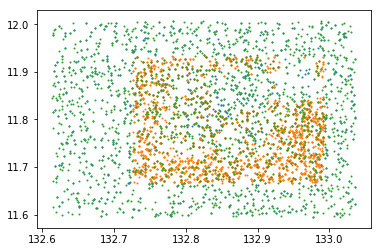

In [34]:
fig , ax = plt.subplots()
#ax.scatter(cluster_table1["r"]-cluster_table1['i'], cluster_table1["i"], s=1)
ax.scatter(mass["ra"], mass["dec"], s=1)
ax.scatter(cluster_table1['ra'], cluster_table1["dec"], s=1)
ax.scatter(wise['ra'], wise['dec'], s=1);

In [49]:
coo_sdss = SkyCoord(cluster_table1['ra']*u.deg, cluster_table1['dec']*u.deg)
coo_twomass = SkyCoord(mass['ra'], mass['dec'])
idx_sdss, d2d_sdss, d3d_sdss = coo_sdss.match_to_catalog_sky(coo_twomass)

NotImplementedError: cannot make a list of Quantities.  Get list of values with q.value.list()

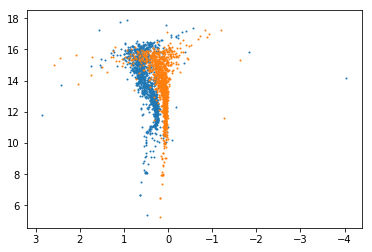

In [37]:
fig , ax = plt.subplots()
#ax.scatter(cluster_table1["r"]-cluster_table1['i'], cluster_table1["i"], s=1)
#ax.scatter(cluster_table1["u"]-cluster_table1['g'], cluster_table1["g"], s=1)
ax.scatter(mass["j_m"]-mass['h_m'], mass["h_m"], s=1)
ax.scatter(mass['h_m']-mass['k_m'], mass['k_m'], s=1)
#plt.xlim(xmin = -5,xmax = 5);
#plt.ylim(ymin = 5,ymax = 30);
ax.invert_xaxis()

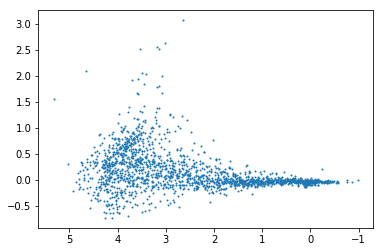

In [42]:
fig , ax = plt.subplots()#u-r on x axis, vs w2-w3 on yaxis w2-w3 on axis vs w1-w2 and w2-w3 vs w3-w4
#ax.scatter(wise["w1mpro"]-wise['w2mpro'], wise["w2mpro"], s=1)
ax.scatter(wise['w2mpro']-wise['w3mpro'], wise["w1mpro"]-wise['w2mpro'], s=1)
#ax.scatter(wise["w3mpro"]-wise['w4mpro'], wise["w4mpro"], s=1)
#ax.scatter(cluster_table1["u"]-cluster_table1['g'], cluster_table1["g"], s=1)
#plt.xlim(xmin = -5,xmax = 5);
#plt.ylim(ymin = 5,ymax = 30);
ax.invert_xaxis()

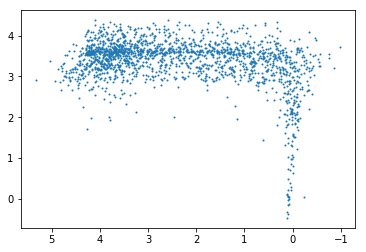

In [44]:
fig , ax = plt.subplots()
ax.scatter(wise['w2mpro']-wise['w3mpro'], wise['w3mpro']-wise['w4mpro'], s=1)
ax.invert_xaxis()